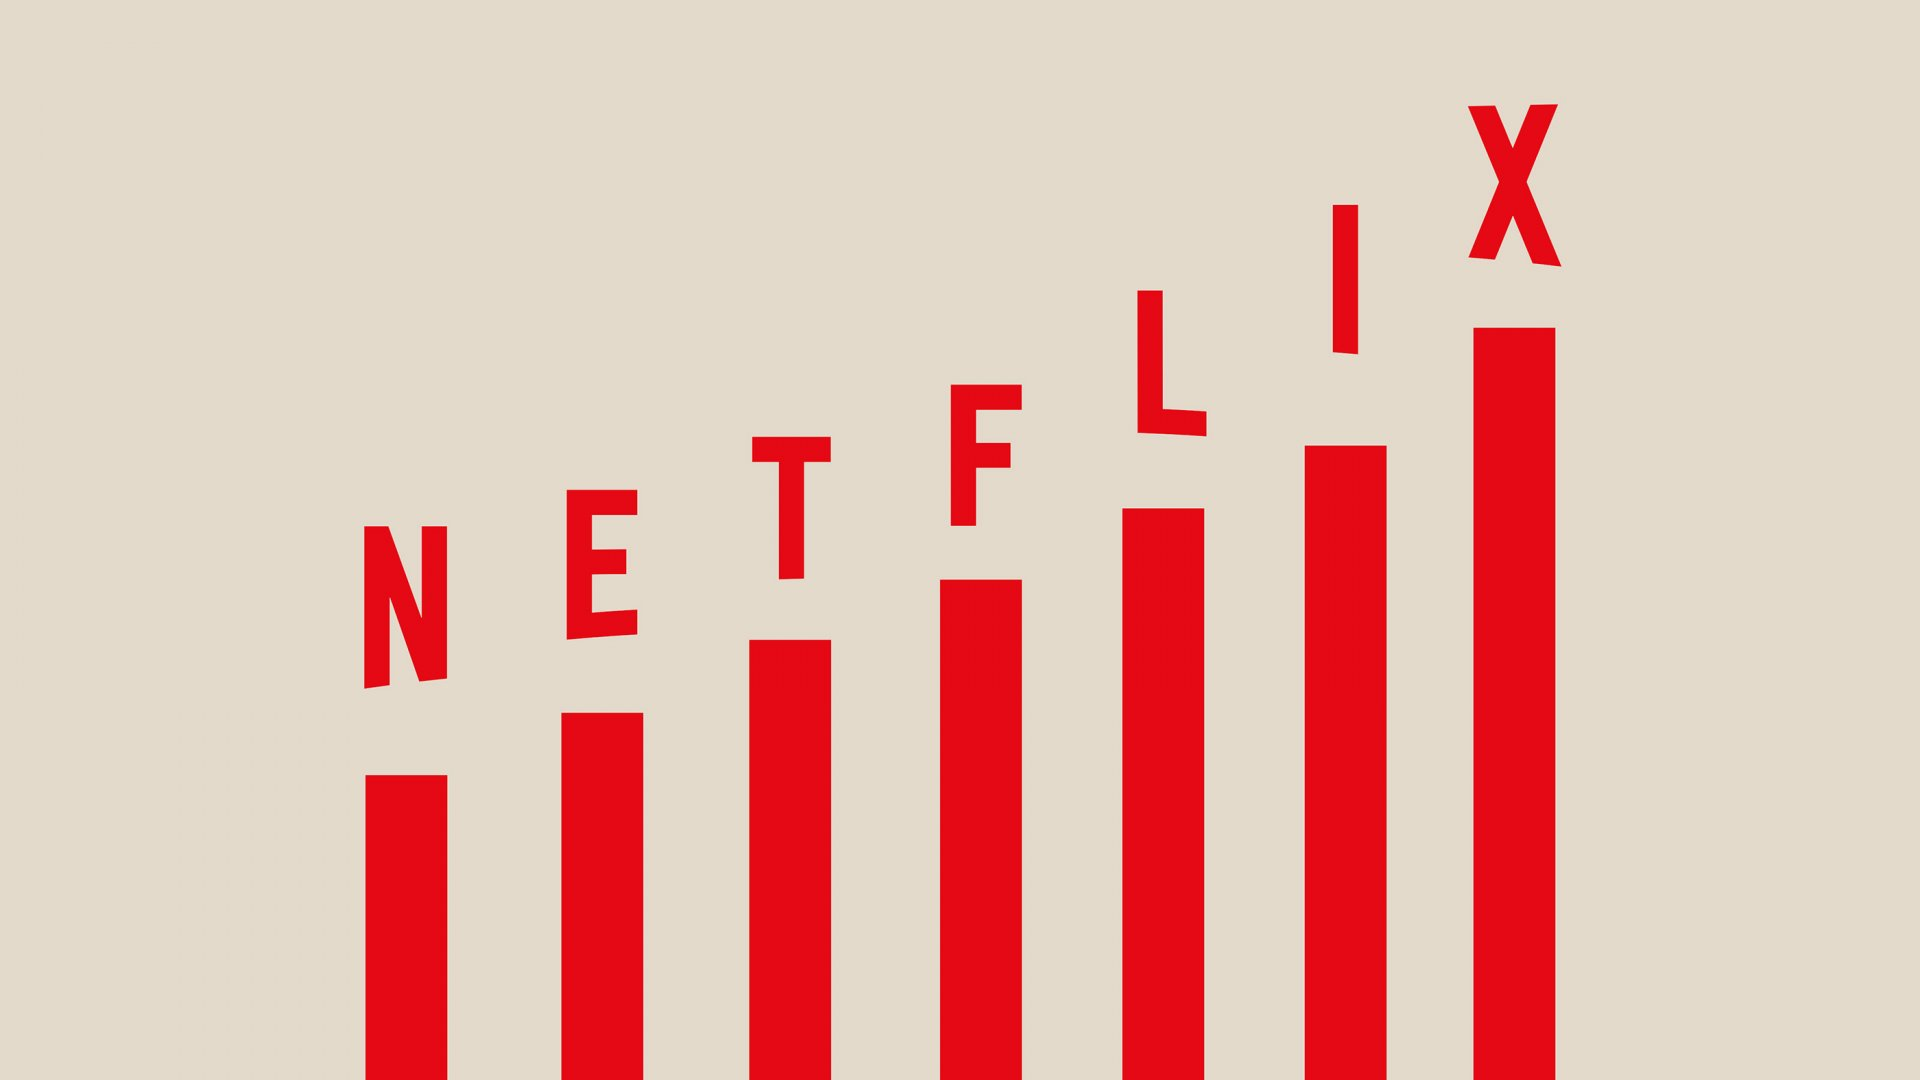
*Illustration: [Inc. Magazine](https://www.inc.com/carmine-gallo/the-7-word-attitude-that-fuels-netflixs-success.html)*  
 <span style= "font-size:4em;">Shows on Netflix</span>  
 <span style="font-size:2.3em;">Explanatory data analysis with (interactive) visuals</span>  
 <span style="font-size:1.4em;color:#404040">  
     By Dennis Kooijman  
    
     Date: 15 January, 2021
 </span>

# Table of Contents
1. [Introduction](#Introduction)  
1.2.[Loading the Data](#Loading)
2. [Explonatory data analysis](#Explonatory)  
2.1 [Duration](#Duration)  
2.2.[Show production per country](#Country)   
2.3 [Number of Shows per Category](#Category)  
3. [Interactive map](#InteractiveMap)

# 1. Introduction <a name="Introduction"></a>
This Notebook goes through the data set of Netflix movies and TV shows by showing (interactive) visuals, that include plots generated with the Plotly library and an interactive choropleth map, showing the number of shows on Netflix produced per country.  
One of the goals of the project was to find interesting trends hidden beneath the data and to search for differences between different categories. Keep reading if you want to find your favourite movie or country in the visuals or map.  
Comments and suggestions are always welcome!


## 1.2 Loading the data <a name="Loading"></a>
First, the needed libraries and dataset are loaded:

In [ ]:
#Importing the needed libraries: 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import os

In [ ]:
# Loading the data set
netflixData = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")
netflixData.head(10)

In [ ]:
netflixData["release_year"] = netflixData["release_year"].astype(int)
netflixData["country"] = netflixData["country"].astype(str)
netflixData.dtypes

The number of NaNs per column: 

In [ ]:
netflixData.isna().sum()

In [ ]:
netflixData['type'] = netflixData['type'].astype("category")
netflixData["rating"] = netflixData['rating'].astype("category")
TVorMovie = netflixData[["type", "title"]].groupby(["type"]).count().rename(columns = {"title": "count"}).reset_index()

# 2. Explonatory data analysis <a name="Explonatory"></a>
The data consist of two show type (movies and TV Shows) given by the type column. 31% of the shows are movies, and 69% are TV Shows. [Figure 1](#Figure1) also gives the number of shows per type. The duration column format is based on the type of the show. The movie type has its duration given in minutes, whereas the duration of the TV Shows type is given in seasons. 
First, the duration of the shows will be explored. Because of the difference in formats, the movies and shows will be discussed separately.



In [ ]:
y = TVorMovie['type']
x = TVorMovie['count']

# Use textposition='auto' for direct text

data= [go.Bar(x = x, 
              y = y,
              text= (x/sum(x)*100).round(0).astype(str) + "%",
              textposition='auto',
              orientation = "h"),
              ]

layout = go.Layout(plot_bgcolor='white',
                   bargap = 0.01,
                   height = 400, 
                   font = {"size": 15,
                           "color": "black"},
                   title = "Number of Movies and shows on netflix", 
                   xaxis_title = "Number of Shows",
                   )

fig = go.Figure(data, layout)
    
fig.update_traces(marker_color=['#E50914', "#131B1D"])

fig.show()

*Figure 1: Number of  Movies and TV Shows on Netflix* <a name="Figure1"></a>

---
## 2.1 Duration of movies  <a name="Duration"></a>

### Duration movies
A movie for everyone! Is it a busy day, but you need those few precious moments to yourself filled to the brim with entertainment? No worries, Netflix has you covered with the shortest movie on the platform, *Cops and Robbers*, taking only 8 minutes of your time. Check it out [here](“https://www.netflix.com/nl-en/title/81354555”).  
Rainy cold day, which just invites you to stay inside on the couch? Check out the longest movie in the arsenal of Netflix, *The School of Mischief*. Make sure your schedule is free though because it takes a whopping 4 hours and 12 minutes!  Check this one out [here](“https://www.netflix.com/nl-en/title/81236594”).

[Figure 2](#Figure2) shows a histogram of all movies on the platform. In the subplot, every line represents one movie. By hovering above the lines you can try and find your favourite movie. One of my favourites *The Lord of the Rings: The Return of the King*, happens to be also one the longest I have ever watched. Can you find it?  

The figure also shows that most movies only take about 1.5 hours of your time. Much better manageable for busy data scientists!

In [ ]:
movies = netflixData[netflixData["type"]=="Movie"].copy()

#Getting the duration in minutes: 
movies["duration"] = movies["duration"].str.split(" ", expand = True)
movies["duration"] = movies["duration"].astype(int)
movies = movies.dropna()

# Creating histogram with plotly
fig = px.histogram(movies,
                   x="duration",
                   hover_data = movies[["title", "duration"]].columns,
                   marginal = "rug",
                   title = "Duration of movies on Netflix",
                   labels = {"duration": "Duration (minutes)"},
                   color_discrete_sequence = ['#E50914'])

fig.update_layout({"plot_bgcolor":"white"},
                  font = {"color": "black", 
                          "size": 15}, 
                 )
                   
fig.show()

*Figure 2: Duration of movies on Netflix* <a name="Figure2"></a>

___
### Duration per rating  
It would also be interesting to see if there are differences in movie duration between different categories. Agian we focus on the movies. The ratings gives an indication for which age groups a movie is suited. First, let’s look at the definitions of the different ratings according to [http://www.tvguidelines.org/](“http://www.tvguidelines.org/resources/TV_Parental_guidelines_Brochure.pdf”)


<center> Table: Meaning of the different ratings </center>

|     Rating      |     Meaning                                                                                                                                        |
|-----------------|----------------------------------------------------------------------------------------------------------------------------------------------------|
|     NC-17       |     No One 17 and Under Admitted. Clearly adult. Young children will not be admitted to   watch the film.                                          |
|     TV-Y7-FV    |     Is used to indicate that a program contains “fantasy   violence” that may be more intense or combative than other TV-Y7 programs.    |
|     UR          |     Unrated                                                                                                                                        |
|     G           |     Most parents would find this program suitable for all ages.                                                                                  |
|     NR          |     Not Rated                                                                                                                                      |
|     TV-Y7       |     This program is designed for children age 7 and above.                                                                                         |
|     TV-G        |     This program is designed for children age 7 and above.                                                                                         |
|     TV-Y        |     This program is designed to be appropriate for all   children                                                                                  |
|     PG          |     This program contains material that parents may find   unsuitable for younger children.                                                        |
|     PG-13       |     Some material may be inappropriate for   children under 13                                                                                     |
|     TV-PG       |     This program contains material that parents may find   unsuitable for younger children.                                                        |
|     R           |     Children Under 17 Require Accompanying Parent or Adult Guardian                                                                                |
|     TV-14       |     This   program contains some material that many parents would find unsuitable for   children under 14 years of     age.                        |
|     TV-MA       |     This   program is specifically designed to be viewed by adults and therefore may be unsuitable   for children     under 17                     |


<n> </n>  
To avoid reporting skewed distributions, the table below shows the number of movies in the data frame for each rating. Three ratings NC-17, TV-Y7-FV, and UR only have a few movies. These categories are therefor not included in the distributions shown in [Figure 3](#Figure3).  


In [ ]:
movies[["rating", "show_id"]].groupby("rating").count().rename(columns = {"show_id": "Count"}
    ).sort_values(by = "Count").style.set_caption("Number of movies per rating")

The distributions for most ratings are very similar with medians ranging from 90 to 100 minutes. An exception with longer movies times is the rating TV-14, with a median of 111 minutes, and some very long movies as outliers, including the longest movie in the data set, Schools of Mischief. 
The exceptions with the shorter movie durations include TV-Y, TV-Y7, and to lesser extent G and TV-G. On average, children movies can be expected to be shorter than movies suited for an older audience. Which can be a valid explanation of the observed differences.   
<n></n>  
**Want to see one or multiple distributions in more detail? Try to click and double click the items in the legend!**

In [ ]:
# Dropping the rating categories with just a few movies 
moviesPlot = movies.drop(movies[(movies['rating'] == "NC-17") | (movies['rating'] == "TV-Y7-FV") | (movies['rating'] == "UR") ].index)

#Creating plotly violin plot 
fig = px.violin(moviesPlot,  
                y = "duration", 
                color ="rating", 
                box = False, 
                points ="outliers",
                hover_data = movies[["title", "duration"]].columns, 
                orientation = "v",
                labels = {"duration": "Duration (minutes)"}, 
                title = "Duration of movies per rating category"
               )

# Updating layout of figure
fig.update_layout({"plot_bgcolor":"white"},
                  font = {"color": "black", 
                          "size": 15},
                 )
fig.update_yaxes(showgrid=True,linewidth=0, linecolor='white',gridcolor='#EAE3E3', gridwidth=0.1)
fig.update_xaxes(showgrid=True,linewidth=0, linecolor='white')

# Showing the figure
fig.show()

*Figure 3: Duration of movies on Netflix per age rating* <a name="Figure3"></a>

___
### Duration of movies through time  
Now let's look if we can find a trend through time for the duration of the movies. First, lets see how many movies per year are present in the dataset. [Figure 4](#Figure4) visualizes the trend in time. 
The number of movies seems to take off after the year 2000, dropping again for movies after 2018, therefore only the movies after 2000 and up to 2021 will be included in the data.  

In [ ]:
moviesByYearCount = movies.groupby('release_year').count().reset_index()

fig = px.line(moviesByYearCount,
              x="release_year",
              y="show_id",
              labels = {"show_id": "Number of Movies", "release_year": "Release Year"},
              title="Number of movies per year", 
              color_discrete_sequence = ['#E50914'])

fig.update_layout({"plot_bgcolor":"white"},
                  font = {"color": "black"},
                 )     
fig.update_yaxes(showgrid=True,linewidth=0, linecolor='white',gridcolor='#EAE3E3', gridwidth=0.1)
fig.update_xaxes(showgrid=True,linewidth=0, linecolor='white')
fig.update_traces(line=dict(width=3))

fig.show()

*Figure 4: Number of movies on Netflix per release year* <a name="Figure4"></a>

[Figure 5](#Figure5) gives the trend in time for the duration of movies on Netflix. This graph seems to indicate that the newer movies on Netflix are shorter than older movies. In a good [read]( https://towardsdatascience.com/are-new-movies-longer-than-they-were-10hh20-50-year-ago-a35356b2ca5b) on Medium by Przemysław Jarząbek the question if new movies kept increasing in run time was investigated. By crunching the numbers of thousands of movies on IMDb.com it was shown that no trend in time was present for the run time of movies, going back to 1960.  

---
So why do we see this trend?  
The reason cannot be answered with this dataset alone. I thought of one possible reason, but do let me know if you can think of others or if you can think of a method to answer this question!

*One hypothesis*  
Movies released in cinemas take longer to be released on streaming services as movies specifically created for such services, e.g. Netflix Originals.  If theatre movies also have longer run times than streaming specific movies, the trend could be explained. IMDb.com does include data about the release dates of movies in theatre and Internet releases. This data could be added to help test this hypothesis.
It is certainly interesting to see if this trend holds for this period in the coming years. 


In [ ]:
fig = sns.jointplot(data = movies[(movies["release_year"]>2000)&(movies["release_year"]<2021)],
                    x="release_year", 
                    y="duration",
                    x_estimator=np.mean,
                    x_ci = 95,
                    kind="reg",
                    xlim = (2000, 2022),
                    ylim = (40 , 140), 
                    height = 8,
                    color ="#E50914"
                     )

fig.set_axis_labels('Release year', 'Duration (minutes)', fontsize=16, color = "black")
fig.fig.suptitle('Duration of movies through the years')
fig.ax_joint.collections[0].set_alpha(0)
fig.fig.tight_layout()
fig.fig.subplots_adjust(top=0.95)

*Figure 5: Duration of movies on Netflix through the years. Every line gives 95% C.I. for the year on x-axis* <a name="Figure5"></a>

___
### Duration movies per category

Figure 6 shows the duration of shows per category. The category with the shortest average duration is stand-up comedy, followed by children and family movies and documentaries. The categories with the longest movies include comedies, dramas, and international movies. It should be noted that one movie, in general, has multiple categories. Meaning that most movies are represented in multiple distributions. 
<n></n> 

**Want to see one or multiple distributions in more detail? Try to click and double click the items in the legend!**

In [ ]:
#create dummies df:
dummiesCategories = movies["listed_in"].str.replace(", ",",").str.get_dummies(sep=",")


#Dropping all categories with less then 100 movies:
dummiesCategoriesCount = dummiesCategories.sum()
drop = dummiesCategoriesCount[dummiesCategoriesCount<100].index.tolist()
dummiesCategories = dummiesCategories.drop(drop, axis =1)

In [ ]:
#Merging 
moviesDummiesCategories = movies.merge(right = dummiesCategories,
                                       how = "left", 
                                       left_index = True,
                                       right_index = True,
                                      )
#Creating plotly violin plot 
fig = go.Figure()

columns = dummiesCategories.columns.tolist()

for category in columns:
    df = moviesDummiesCategories[moviesDummiesCategories[category] == 1]
    
    fig.add_trace(go.Violin(y = df['duration'],
                            name = category,
                            box_visible= False,
                            points = "outliers",
                            meanline_visible=True))

fig.update_layout({"plot_bgcolor":"white"},
                  font = {"color": "black"},
                  xaxis_title = "Category",
                  yaxis_title = "Duration (minutes)",
                  title = "Duration movies per Category Netflix"
                 )                            

fig.update_yaxes(showgrid=True,linewidth=0, linecolor='white',gridcolor='#EAE3E3', gridwidth=0.1)
fig.update_xaxes(showgrid=True,linewidth=0, linecolor='white')

# Showing the figure
fig.show()

*Figure 6: Duration of movies on Netflix per category* <a name="Figure6"></a>

---
***Duration movies for top producing countries***  

The table below shows the top 10 producing countries of movies on Netflix. Hollywood and Bollywood seem to lead the list, with the United States and India having produced 1627 and 827 movies respectively. After the top 2, the number of movies per country declines rapidly with only 67 movies for the number 10 Indonesia. 

In [ ]:
top10 = movies[["show_id", "country"]].groupby("country").count().sort_values(by = "show_id", ascending = False).rename(columns = {"show_id":"Number of Movies"}).head(10)
top10.style.set_caption("Top 10 producing countries of movies on Netflix")

[Figure 7](#Figure4) shows the distributions for the Top 4 countries, the United States, India, United Kingdom, and Canada. For the three western countries, the distributions appear to be very similar with medians of ranging from 90 to 100 minutes. 
On the other hand, movies produced in India seem to be much longer with a median of 127 minutes and an average of 128 minutes


In [ ]:
#One-hot encodiung based on country
countriesDummies = movies['country'].str.get_dummies(sep=",")
countriesDummiesTop4 =countriesDummies[["United States","India","United Kingdom","Canada"]]
neflixDataDummiesTop4 = movies.merge(right = countriesDummiesTop4, how = 'left', left_index = True, right_index = True)

#Creating plotly violin plot 
fig = go.Figure()

columns = ["United States","India","United Kingdom","Canada"]

for country in columns:
    df = neflixDataDummiesTop4[neflixDataDummiesTop4[country] == 1]
    
    fig.add_trace(go.Violin(y = df['duration'],
                            name = country,
                            box_visible= False,
                            points = "outliers",
                            meanline_visible=True))

fig.update_layout({"plot_bgcolor":"white"},
                  font = {"color": "black"},
                  xaxis_title = "Country",
                  yaxis_title = "Duration (minutes)",
                  title = "Duration movies on Netflix for top 4 producing countries"
                 )                            

fig.update_yaxes(showgrid=True,linewidth=0, linecolor='white',gridcolor='#EAE3E3', gridwidth=0.1)
fig.update_xaxes(showgrid=True,linewidth=0, linecolor='white')

# Showing the figure
fig.show()

*Figure 7: Duration of movies on Netflix for top 4 producing countries* <a name="Figure7"></a>

## 2.2 Show production per country <a name="Country"></a>
* Number of shows per country by using one-hot encoding (multiple countries for some shows). This show is counted for each country listed.

[Figure 8](#Figure8) shows the number of shows for the top 30 producing countries of shows on Netflix. Holywood and Bollywood seem to lead the list, with the U.S.A. and India producing 3297 and 990 shows respectively. Afterwhich the numbers drop rapidly. Number 30 has produced only 39 of the shows visible on Netflix. Again, some shows are produced in multiple countries meaning that the same shows can be counted for multiple countries.

In [ ]:
#One hot encoding netflixData based on country 
countriesDummies = netflixData['country'].str.get_dummies(sep=",")

countriesCount = countriesDummies.sum()
countriesCount = countriesCount.reset_index().rename(columns = {"index": "Country", 0:"Number of Shows"})
countriesCount['Country'] = countriesCount['Country'].str.strip()

countriesCount.loc[countriesCount['Country'].str.strip() == "United States", 'Country'] = "United States of America"
countriesCount = countriesCount.groupby("Country").sum().reset_index().sort_values(by = "Number of Shows", ascending = False)
countriesCount = countriesCount[countriesCount.Country != 'nan']

#Creating bar plot 
fig = px.bar(countriesCount.head(30), 
             x='Country', 
             y='Number of Shows', 
             #log_y = True,
             color_discrete_sequence = ['#E50914'], 
             title = "Countries of origin for shows on Netflix, top 30")

fig.update_layout({"plot_bgcolor":"white"},
                  font = {"color": "black"} 
                 )
fig.show()

*Figure 8: Number of shows on Netflix for top 30 producing countries* <a name="Figure8"></a>

## 2.3 Number of shows per category <a name="Category"></a>


[Figure 9](#Figure9) shows all the categories in the “listed_in” column of the dataset. International movies seem to bet the largest category of all, followed closely by Drama. After the category drama, the number of shows decreases rapidly. The smallest category is classic movies, with only 103 shows. Seems like Netflix is strict with naming classics!


In [ ]:
#create dummies df:
dummiesCatShows = netflixData["listed_in"].str.replace(", ",",").str.get_dummies(sep=",")
dummiesCatShowsCount = dummiesCatShows.sum()

#Dropping all categories with less then 100 shows:
drop = dummiesCatShowsCount[dummiesCatShowsCount<100].index.tolist()
dummiesCatShows = dummiesCatShows.drop(drop, axis =1)

#Barplot categories with plotly 
fig = px.bar(dummiesCatShows.sum().reset_index().sort_values(by = 0, ascending = False), 
             x='index', 
             y=0, 
             color_discrete_sequence = ['#E50914'], 
             title = "Number of shows per category on Netflix",
             labels = {"index": "Category", "0": "Number of Shows"})

fig.update_layout({"plot_bgcolor":"white"},
                  font = {"color": "black"} 
                 )
fig.show()

*Figure 9: Number of shows on Netflix for top 30 producing countries* <a name="Figure9"></a>

# 3. Interative Map <a name="InteractiveMap"></a>
Lets now combine some of the information we have gathered on countries and categories into one the interactive map in [Figure 10](#Figure10). The colours of the maps indicate the number of produced shows per country. Try to hover above the map and you will see for each country, the name, the number of shows produced, and the most popular production category. For this interactive map, the categories International movies and TV Shows categories have not been included. After all, these change depending on where you are from. 

Can you find some interesting countries, based on this data? 

In [ ]:
#Importing libraries to create interactive map:
import folium
import requests
import branca.colormap as cmp
import json
import geopandas

In [ ]:
# JSON file with geodata for the countries: 
geo = "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json"

In [ ]:
# Removing International movies/TV Shows:
dummiesCatShows = dummiesCatShows.drop(["International TV Shows","International Movies"], axis = 1)

# One hot encoding for countries 
netflixDataDummiesCountries =  netflixData["country"].str.replace(", ",",").str.get_dummies(sep=",")
netflixDataDummiesCountries = netflixDataDummiesCountries.rename(columns={'United States':'United States of America'})



#initializing data frame to store most produced show category per country
mostProducedCatPerCountry = pd.DataFrame()

for country in netflixDataDummiesCountries.columns.tolist():
    index = netflixDataDummiesCountries[netflixDataDummiesCountries[country]==1].index
    category = dummiesCatShows.iloc[index].sum().idxmax()
    lib = {"Country": country, "Category":category}
    mostProducedCatPerCountry = mostProducedCatPerCountry.append(lib,ignore_index=True)
    #print(country, category)

In [ ]:
df = geopandas.read_file(geo)
df = df.merge(right = mostProducedCatPerCountry, left_on = "name", right_on = "Country")
df = df.drop("Country", axis =1)
df = df.merge(right = countriesCount, left_on = "name", right_on = "Country")
df = df.drop("Country", axis =1)
df = df.rename(columns = {"Category": "Most popular production category:", 'name': 'Country:','Number of Shows':"Number of Shows:" })

df.to_file("output.json", driver="GeoJSON")

step = cmp.StepColormap(
 ["#fdc9cb", '#fcb6ba', '#fb9096', '#f96b72',"#f85860", '#f7323c', "#E50914"],
 vmin=1, vmax=1000,
 index=[1,5, 20,100,200,500, 3297, ],  #for change in the colors, not used fr linear
 caption='Number of shows on Netflix produced'    #Caption for Color scale or Legend
)

def getNumberOfShows(feature):
    country = feature['properties']["Country:"]
    NumOfShows = countriesCount.loc[countriesCount['Country'].str.strip() == country, 'Number of Shows']
    NumOfShows = NumOfShows.values.tolist()
    NumOfShows = NumOfShows[0]
    return NumOfShows

worldMap = folium.Map(location = [0,0],
                      zoom_start = 2, 
                      control_scale=True,
                      tiles = 'https://{s}.basemaps.cartocdn.com/rastertiles/light_nolabels/{z}/{x}/{y}.png',
                      attr = '<a href="http://jawg.io" title="Tiles Courtesy of Jawg Maps" target="_blank">&copy; <b>Jawg</b>Maps</a> &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors')

geoJSON = folium.GeoJson("output.json", 
               name="geojson", 
               style_function = lambda feature: {
                                                 'fillColor': step(getNumberOfShows(feature) ),
                                                 'color': '#C1B9B8',       #border color for the color fills
                                                 'weight': 1,            #how thick the border has to be
                                                 'dashArray': '5, 3',     #dashed lines length,space between them
                                                 'fillOpacity': 0.9                                                                                                                                                                                                                             
                                                }
              ).add_to(worldMap)

folium.features.GeoJsonTooltip(["Country:","Most popular production category:", 'Number of Shows:'],labels=True).add_to(geoJSON)
step.add_to(worldMap) 
worldMap

# Future work?

# If you liked this notebook upvotes are highly appreciated!
# Thank you for reading!

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session